# Part I - Linear Clasifier

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)


K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr

iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6

loss_history = []
train_acc_history = []   #training set accuracy history
val_loss_history = []   #testing set loss history
val_acc_history = []     #testing set accuracy history

seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)

    # Forward pass
    x = x_train[indices]
    y = y_train[indices]
    y_pred = x.dot(w1)+b1
    loss = 1./batch_size*np.square(y_pred-y).sum()+reg*np.sum(w1*w1)
    accuracy =1/batch_size*(np.abs(np.argmax(y,axis=1)==np.argmax(y_pred,axis=1))).sum()

    loss_history.append(loss)
    train_acc_history.append(accuracy)

    #loss and accuracy values of the test set in each epoch; this doesnt contribute for the learning of the network
    test_y_pred = x_test.dot(w1)+b1
    test_loss = 1./Nte*np.square(test_y_pred-y_test).sum()+reg*np.sum(w1*w1)
    test_accuracy =1/Nte*(np.abs(np.argmax(y_test,axis=1)==np.argmax(test_y_pred,axis=1))).sum()

    val_loss_history.append(test_loss)
    val_acc_history.append(test_accuracy)


    # Backward pass
    dy_pred = 1./batch_size*2.0*(y_pred-y)
    dw1 = x.T.dot(dy_pred)+reg*w1
    db1 = dy_pred.sum(axis=0)
    w1-=lr*dw1
    b1-=lr*db1
    lr*=lr_decay

    # Printing losses and accuracies
    if t%10==0:
        print('iteration %d / %d : loss %f : accuracy %f : test_loss %f : test_accuracy %f '%(t,iterations,loss,accuracy,test_loss,test_accuracy))
       # print('iteration %d / %d : loss %f '%(t,iterations,loss))






x_train:  (50000, 32, 32, 3)
x_test:  (10000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
iteration 0 / 300 : loss 0.999982 : accuracy 0.100560 : test_loss 0.999985 : test_accuracy 0.102300 
iteration 10 / 300 : loss 0.876637 : accuracy 0.354320 : test_loss 0.876238 : test_accuracy 0.351700 
iteration 20 / 300 : loss 0.842541 : accuracy 0.372900 : test_loss 0.842418 : test_accuracy 0.373200 
iteration 30 / 300 : loss 0.823617 : accuracy 0.381940 : test_loss 0.823716 : test_accuracy 0.382100 
iteration 40 / 300 : loss 0.812389 : accuracy 0.388220 : test_loss 0.812708 : test_accuracy 0.387200 
iteration 50 / 300 : loss 0.805426 : accuracy 0.393160 : test_loss 0.805971 : test_accuracy 0.390300 
iteration 60 / 300 : loss 0.800906 : accuracy 0.396040 : test_loss 0.801680 : test_accuracy 0.392100 
iteration 70 / 300 : loss 0.797822 : accuracy 0.398760 : test_loss 0.798825 : test_accuracy 0.393800 
iteration 80 / 300 : loss 0.795605 : accuracy 0.401160 : test_loss 0.796835 : test_accuracy 0.395100 
i

# Plot the training and testing loss and accuracies

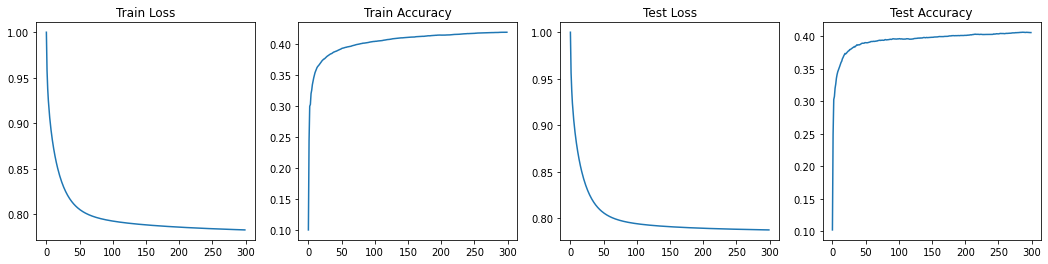

In [42]:
fig,ax = plt.subplots(1,4,figsize=(18,4))
ax[0].plot(loss_history)
ax[0].set_title('Train Loss')
#ax[0].set_xticks([]),ax[0].set_yticks([])
#ax[0].set_ylim(0.75,1.005)

ax[1].plot(train_acc_history)
ax[1].set_title('Train Accuracy')
#ax[1].set_xticks([]),ax[1].set_yticks([])
#ax[1].set_ylim(-0.12,0.02)


ax[2].plot(val_loss_history)
ax[2].set_title('Test Loss')
#ax[1].set_xticks([]),ax[1].set_yticks([])
#ax[1].set_ylim(-0.12,0.02)


ax[3].plot(val_acc_history)
ax[3].set_title('Test Accuracy')
#ax[1].set_xticks([]),ax[1].set_yticks([])
#ax[1].set_ylim(-0.12,0.02)
plt.show()

In [26]:
w1.shape

(3072, 10)

# Display the weights matrix

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

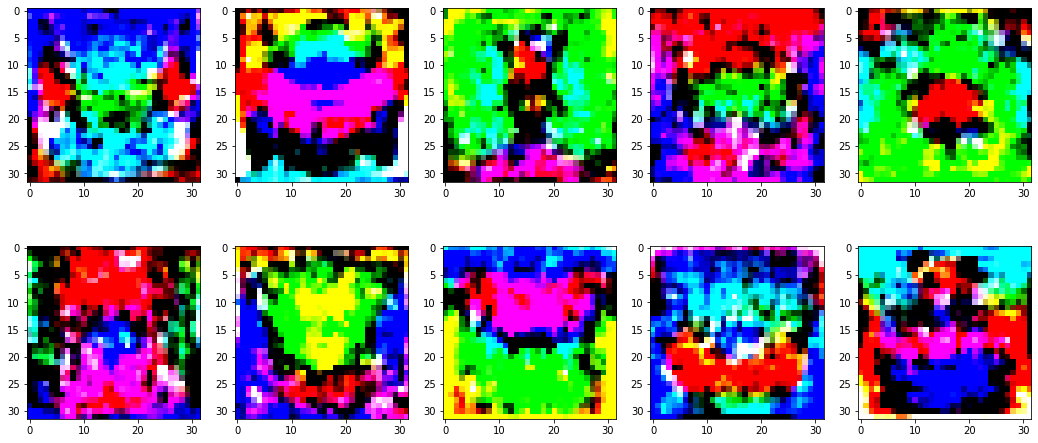

In [40]:
fig = plt.figure(figsize=(18,8))

for i in range(10):
    plt.subplot(2,5,i+1)
    img = w1[:,i].reshape(32,32,3)
    plt.imshow(img*1000)
plt.show()


In [41]:
x_t = x_train
print('x_train->',x_t.shape)
y_pred = x_t.dot(w1)+b1

train_acc = 1/Ntr*(np.abs(np.argmax(y_train,axis=1)==np.argmax(y_pred,axis=1))).sum()
print('train_acc = ',train_acc)


x_t = x_test
print('x_test->',x_t.shape)
y_pred = x_t.dot(w1)+b1

test_acc = 1/Nte*(np.abs(np.argmax(y_test,axis=1)==np.argmax(y_pred,axis=1))).sum()
print('test_acc = ',test_acc)

x_train-> (50000, 3072)
train_acc =  0.41946000000000006
x_test-> (10000, 3072)
test_acc =  0.4057
